In [1]:
### Model Methodology for credit scoring

In [2]:
#We  have 2 csv, test & train.
#Join in one, to explore, clean and learn about the event to predict
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#load 2 csv.
#test desnt have the dependent variable
#test = pd.read_csv('test.csv', parse_dates=[[0,1]], infer_datetime_format=True)
#add mark to know is source T = test
#test['split']='TS'

In [4]:
#test.head()

In [5]:
#load train
#train has the dependent variable!!!!
    #train = pd.read_csv('train.csv', parse_dates=[[0,1]], infer_datetime_format=True) had problem...
train = pd.read_csv('train.csv', delimiter=',')
test = pd.read_csv('test.csv', delimiter=',')

In [6]:
#Get a sample of 30% it is a big database and consume a lot of memory
train_sample = train.sample(frac=1)
test_sample = test.sample(frac=1)

In [7]:
train_sample.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
219099,466073,37149,87221,45.29,120,24279,48,6931,01-01-66,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
89705,605463,40394,76335,54.37,251,23208,49,6867,27-09-97,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
188832,466640,35439,66539,55.61,11,23178,51,6000,10-03-97,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
226106,605702,50328,58722,88.55,105,20333,45,1240,23-05-78,Salaried,...,0,0,0,0,0,0,1yrs 0mon,1yrs 4mon,0,0
177047,428039,31359,44161,73.59,18,14046,48,2779,26-06-95,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [8]:
#the model will be built with train 
vehicle=train_sample

In [9]:
# 40 variables + 1 target 
vehicle.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
219099,466073,37149,87221,45.29,120,24279,48,6931,01-01-66,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
89705,605463,40394,76335,54.37,251,23208,49,6867,27-09-97,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
188832,466640,35439,66539,55.61,11,23178,51,6000,10-03-97,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
226106,605702,50328,58722,88.55,105,20333,45,1240,23-05-78,Salaried,...,0,0,0,0,0,0,1yrs 0mon,1yrs 4mon,0,0
177047,428039,31359,44161,73.59,18,14046,48,2779,26-06-95,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [10]:
#indentify categorical variables vs numerical because treatment is different
vehicle.dtypes
test_sample.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [11]:
#sise of dataframe
print(vehicle.shape)
print(test_sample.shape)

(233154, 41)
(112392, 40)


In [12]:
#UNIVARIATE ANALYSIS

vehicle.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


0    182543
1     50611
Name: loan_default, dtype: int64

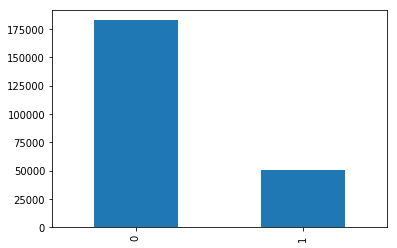

In [13]:
# Dependent variables 
# analyze with freqencies
title= 'loan default'
vehicle['loan_default'].value_counts().plot('bar')
vehicle['loan_default'].value_counts()
# 1 represents xx% of total. Have enough cases to model!!

In [14]:
# calcualte BAd Rate = target
## 15287/54659=

In [15]:
# employee type has missing.. but maybe we could assing a new category "Not reported" instead of deleting all these records..
vehicle['Employment.Type'].fillna('Not Reported', inplace=True)
test_sample['Employment.Type'].fillna('Not Reported', inplace=True)

vehicle['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Not Reported       7661
Name: Employment.Type, dtype: int64

In [16]:
#select continous variables plus target to graph
continuous=vehicle[['loan_default','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'asset_cost',
          'PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT','ltv', 'disbursed_amount' ]]


In [17]:
#Univariate for continuos
print(continuous.describe())
#copy to excel
#ltv, asset cost, score for those who have, balance 
#some have similar numbers....... see correlation later

        loan_default  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  \
count  233154.000000                        233154.000000   
mean        0.217071                             0.097481   
std         0.412252                             0.384439   
min         0.000000                             0.000000   
25%         0.000000                             0.000000   
50%         0.000000                             0.000000   
75%         0.000000                             0.000000   
max         1.000000                            20.000000   

       NEW.ACCTS.IN.LAST.SIX.MONTHS  PERFORM_CNS.SCORE  PRI.CURRENT.BALANCE  \
count                 233154.000000      233154.000000         2.331540e+05   
mean                       0.381833         289.462994         1.659001e+05   
std                        0.955107         338.374779         9.422736e+05   
min                        0.000000           0.000000        -6.678296e+06   
25%                        0.000000           0.000000 

In [18]:
# select categorical and continuos separately to see them clear
#sns.pairplot(continuous,hue='loan_default')

In [19]:
# select categorical and continuos separately to see them clear
#sns.pairplot(vehicle,hue='loan_default')

In [20]:
#Falta aqui lo de las categoricas y las continuas que habia hecho... incorporar aqui

In [21]:
#determining MISSING or null values 
vehicle.isnull().sum()
#only one variable has a problem that it will be fixed
test_sample.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

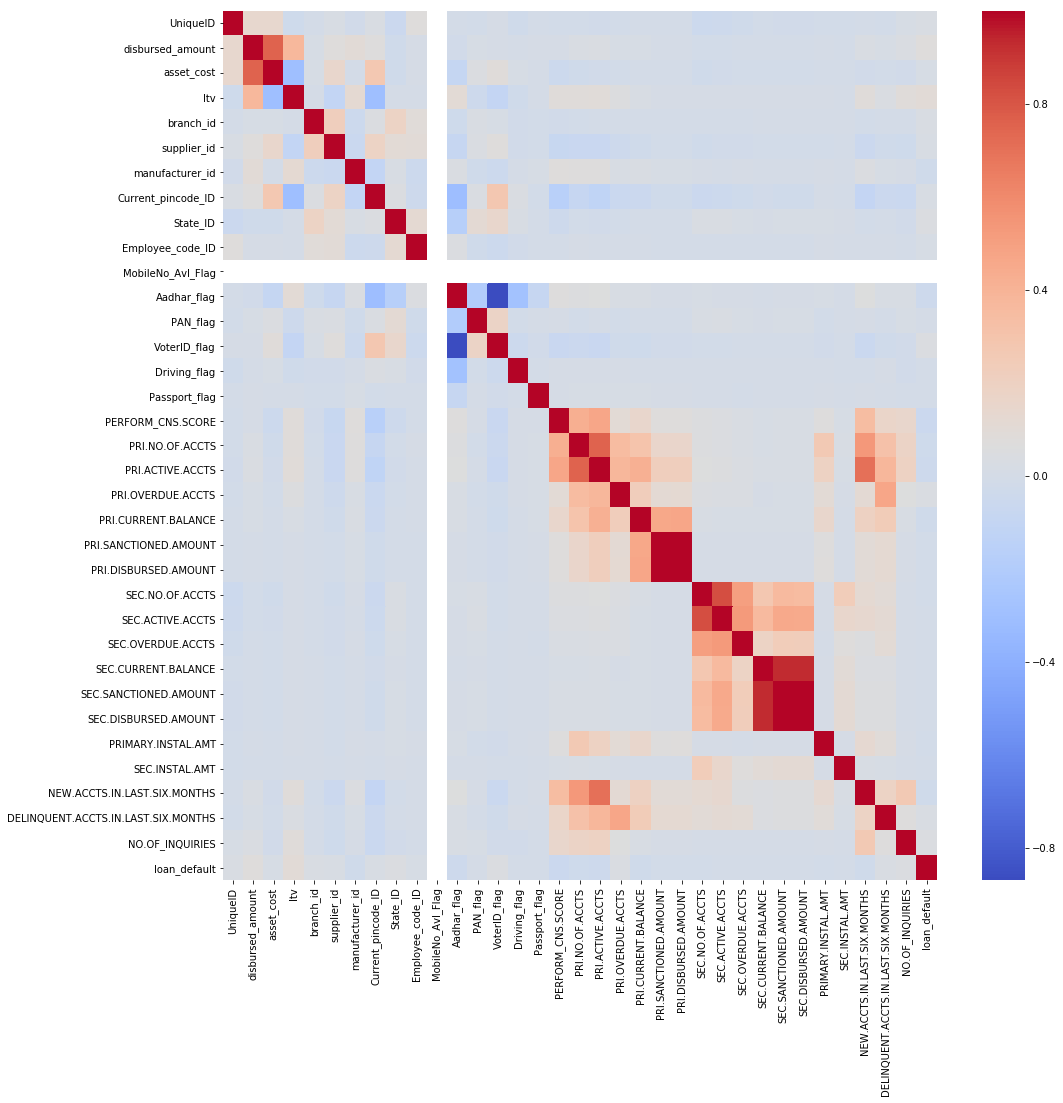

In [22]:
# Identify correlation between variables 
plt.figure(figsize = (16,16))
corr = sns.heatmap(vehicle.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")
#conclusion: there are correlated variables, we will need to apply some reduction variables techniques.. like clustering
#correlated variables add noise to the model
#balances are strongly correlated

In [23]:
# problem detected with variable.. values_ 0yrs 6mon  1yrs 3mon itiis not useful in this way for the model
vehicle['AVERAGE.ACCT.AGE'].value_counts()
# need to be converted to number!!!!!! 
#split in two.. and then apply formula yrs*12+mon=avg_acct_mons

0yrs 0mon      119373
0yrs 6mon        6028
0yrs 7mon        5366
0yrs 11mon       5237
0yrs 10mon       5143
1yrs 0mon        5031
0yrs 9mon        5018
0yrs 8mon        4892
1yrs 1mon        4465
0yrs 5mon        4354
0yrs 4mon        4269
1yrs 2mon        3941
1yrs 3mon        3694
0yrs 3mon        3570
1yrs 4mon        3146
1yrs 5mon        2980
0yrs 2mon        2933
1yrs 6mon        2782
1yrs 7mon        2477
1yrs 8mon        2216
0yrs 1mon        2207
1yrs 9mon        2037
1yrs 10mon       1978
2yrs 0mon        1963
2yrs 1mon        1945
1yrs 11mon       1903
2yrs 2mon        1478
2yrs 3mon        1270
2yrs 4mon        1241
2yrs 6mon        1165
                ...  
13yrs 10mon         2
15yrs 0mon          2
13yrs 7mon          2
13yrs 4mon          2
14yrs 3mon          2
14yrs 7mon          2
12yrs 2mon          2
13yrs 3mon          2
17yrs 10mon         2
24yrs 4mon          1
13yrs 11mon         1
16yrs 0mon          1
14yrs 1mon          1
14yrs 5mon          1
18yrs 11mo

In [24]:
#split columns get yrs and months.
vehicle['ACCT.YRS'], vehicle['ACCT.MOS'] = vehicle['AVERAGE.ACCT.AGE'].str.split(' ', 1).str
test_sample['ACCT.YRS'], test_sample['ACCT.MOS'] = test_sample['AVERAGE.ACCT.AGE'].str.split(' ', 1).str

In [25]:
#delete words yrs and mon  - overwrite cols
vehicle['ACCT.YRS'] = vehicle['ACCT.YRS'].str.replace('yrs','',case = False )
vehicle['ACCT.MOS'] = vehicle['ACCT.MOS'].str.replace('mon','',case = False )

test_sample['ACCT.YRS'] = test_sample['ACCT.YRS'].str.replace('yrs','',case = False )
test_sample['ACCT.MOS'] = test_sample['ACCT.MOS'].str.replace('mon','',case = False )

In [26]:
#convert from objets to values apply formula to get age

vehicle['ACCT.YRS_num']=pd.to_numeric(vehicle['ACCT.YRS'])
vehicle['ACCT.MOS_num']=pd.to_numeric(vehicle['ACCT.MOS'])
vehicle['AVG_ACC_AGE_MOS']=vehicle['ACCT.YRS_num']*12 + vehicle['ACCT.MOS_num']

test_sample['ACCT.YRS_num']=pd.to_numeric(test_sample['ACCT.YRS'])
test_sample['ACCT.MOS_num']=pd.to_numeric(test_sample['ACCT.MOS'])
test_sample['AVG_ACC_AGE_MOS']=test_sample['ACCT.YRS_num']*12 + test_sample['ACCT.MOS_num']

In [27]:
# analize new variable 
vehicle['AVG_ACC_AGE_MOS'].describe()
test_sample['AVG_ACC_AGE_MOS'].describe()

count    112392.000000
mean          8.840772
std          14.989789
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         310.000000
Name: AVG_ACC_AGE_MOS, dtype: float64

In [28]:
# there are many no hit... so it will be better to work with CNS desciption...
#vehicle['PERFORM_CNS.SCORE'].describe()

In [29]:
#pd.crosstab(vehicle['PERFORM_CNS.SCORE'],vehicle['PERFORM_CNS.SCORE.DESCRIPTION']).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(vehicle['PERFORM_CNS.SCORE'],vehicle['PERFORM_CNS.SCORE.DESCRIPTION'])
# Low risk begin with A..... 
#use betther the description

PERFORM_CNS.SCORE.DESCRIPTION,A-Very Low Risk,B-Very Low Risk,C-Very Low Risk,D-Very Low Risk,E-Low Risk,F-Low Risk,G-Low Risk,H-Medium Risk,I-Medium Risk,J-High Risk,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
PERFORM_CNS.SCORE,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,116950,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,976,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3765
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2885,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3672,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1534,0,0,0
300,0,0,0,0,0,0,0,0,0,0,0,0,8776,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0


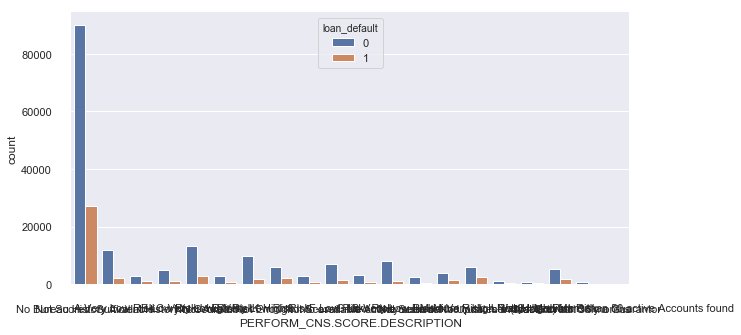

In [30]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(10,5)})
# create a countplot
chart=sns.countplot('PERFORM_CNS.SCORE.DESCRIPTION',data=vehicle,hue = 'loan_default')
# Remove the top and down margin
chart=sns.despine(offset=10, trim=True)
#chart.set_xticklabels(rotation=45)
# display the plotplt.show()

#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [31]:
#analyze CREDIT.HISTORY.LENGTH
vehicle['CREDIT.HISTORY.LENGTH']
#fix the variable.. convert to months

219099     0yrs 0mon
89705      0yrs 0mon
188832     0yrs 0mon
226106     1yrs 4mon
177047     0yrs 0mon
184229     0yrs 0mon
112262     0yrs 8mon
10443      0yrs 0mon
113882     1yrs 1mon
226028     0yrs 0mon
101233    10yrs 0mon
132364     0yrs 0mon
182233    10yrs 6mon
139509     0yrs 0mon
33113      4yrs 7mon
49643      0yrs 0mon
202823     0yrs 0mon
75104      1yrs 4mon
124205     0yrs 0mon
8522       0yrs 0mon
78646      1yrs 3mon
119656     0yrs 0mon
47345     2yrs 11mon
63430      1yrs 8mon
213378     1yrs 9mon
169958     2yrs 9mon
93605      0yrs 0mon
149710     0yrs 0mon
61017      0yrs 2mon
21064      1yrs 8mon
             ...    
123774     0yrs 3mon
157806     0yrs 0mon
130492     0yrs 0mon
87508      0yrs 0mon
208054    0yrs 11mon
85826      0yrs 0mon
107222     0yrs 0mon
89183      0yrs 0mon
143538     2yrs 0mon
203872    7yrs 11mon
49723      6yrs 5mon
49252      0yrs 9mon
19765      0yrs 0mon
18424      0yrs 0mon
230868     0yrs 0mon
91561      0yrs 0mon
82648      0y

In [32]:
vehicle['CRED_HIST.YRS'], vehicle['CRED_HIST.MOS'] = vehicle['CREDIT.HISTORY.LENGTH'].str.split(' ', 1).str
#delete words yrs and mon  - overwrite cols
vehicle['CRED_HIST.YRS'] = vehicle['CRED_HIST.YRS'].str.replace('yrs','',case = False )
vehicle['CRED_HIST.MOS'] = vehicle['CRED_HIST.MOS'].str.replace('mon','',case = False )
vehicle['CRED_HIST.YRS_num']=pd.to_numeric(vehicle['CRED_HIST.YRS'])
vehicle['CRED_HIST.MOS_num']=pd.to_numeric(vehicle['CRED_HIST.MOS'])
vehicle['PAY_CREDIT.HISTORY.LENGTH']=vehicle['CRED_HIST.YRS_num']*12 + vehicle['CRED_HIST.MOS_num']

test_sample['CRED_HIST.YRS'], test_sample['CRED_HIST.MOS'] = test_sample['CREDIT.HISTORY.LENGTH'].str.split(' ', 1).str
#delete words yrs and mon  - overwrite cols
test_sample['CRED_HIST.YRS'] = test_sample['CRED_HIST.YRS'].str.replace('yrs','',case = False )
test_sample['CRED_HIST.MOS'] = test_sample['CRED_HIST.MOS'].str.replace('mon','',case = False )
test_sample['CRED_HIST.YRS_num']=pd.to_numeric(test_sample['CRED_HIST.YRS'])
test_sample['CRED_HIST.MOS_num']=pd.to_numeric(test_sample['CRED_HIST.MOS'])
test_sample['PAY_CREDIT.HISTORY.LENGTH']=test_sample['CRED_HIST.YRS_num']*12 + test_sample['CRED_HIST.MOS_num']

In [33]:
# since there are many no hit, then there are many no lenth history
vehicle['PAY_CREDIT.HISTORY.LENGTH'].describe()
test_sample['PAY_CREDIT.HISTORY.LENGTH'].describe()

count    112392.000000
mean         15.494822
std          27.460379
min           0.000000
25%           0.000000
50%           0.000000
75%          23.000000
max         451.000000
Name: PAY_CREDIT.HISTORY.LENGTH, dtype: float64

In [34]:
vehicle['DisbursalDate'] = pd.to_datetime(vehicle['DisbursalDate'], format = "%d-%m-%y",infer_datetime_format=True)
vehicle['Date.of.Birth'] = pd.to_datetime(vehicle['Date.of.Birth'], format = "%d-%m-%y",infer_datetime_format=True)

test_sample['DisbursalDate'] = pd.to_datetime(test_sample['DisbursalDate'], format = "%d-%m-%y",infer_datetime_format=True)
test_sample['Date.of.Birth'] = pd.to_datetime(test_sample['Date.of.Birth'], format = "%d-%m-%y",infer_datetime_format=True)

In [35]:
vehicle['DisbursalDate'].dtype
#vehicle['Date.of.Birth']


dtype('<M8[ns]')

In [36]:
#create variable AGE of customer 
now = pd.Timestamp('now')
vehicle['Age'] = (now - vehicle['Date.of.Birth']).astype('<m8[Y]').astype(int)
#age_mean = int(vehicle[vehicle['Age']>0]['Age'].mean())
test_sample['Age'] = (now - test_sample['Date.of.Birth']).astype('<m8[Y]').astype(int)

In [37]:
#analyze variable
vehicle['Age'].describe()
test_sample['Age'].describe()

count    112392.000000
mean         26.482881
std          23.513405
min         -50.000000
25%          25.000000
50%          31.000000
75%          39.000000
max          50.000000
Name: Age, dtype: float64

In [38]:
vehicle['Date.of.Birth'].min()

Timestamp('1969-01-01 00:00:00')

In [39]:
vehicle["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [40]:
#csb description convert to numeric...and get the addional segmentation of risk (letter)

risk_map  = {'No Bureau History Available':-1, 
              'Not Scored: No Activity seen on the customer (Inactive)':-1,
              'Not Scored: Sufficient History Not Available':-1,
              'Not Scored: No Updates available in last 36 months':-1,
              'Not Scored: Only a Guarantor':-1,
              'Not Scored: More than 50 active Accounts found':-1,
              'Not Scored: Not Enough Info available on the customer':-1,
              'Very Low Risk':4,
              'Low Risk':3,
              'Medium Risk':2, 
              'High Risk':1,
              'Very High Risk':0}

sub_risk  = {'unknown':0, 'I':-1, 'L':2, 'A':13, 'D':10, 'M':1, 'B':12, 'C':11, 'E':9, 'H':6, 'F':8, 'K':3,'G':7, 'J':4}
def credit_risk(vehicle):
    d1=[]
    d2=[]
    for i in vehicle:
        p = i.split("-")
        if len(p) == 1:
            d1.append(p[0])
            d2.append('unknown')
        else:
            d1.append(p[1])
            d2.append(p[0])

    return d1,d2


vehicle.loc[:,'credit_risk'],vehicle.loc[:,'credit_risk_grade']  = credit_risk(vehicle["PERFORM_CNS.SCORE.DESCRIPTION"])

vehicle.loc[:,'credit_risk_label'] = vehicle['credit_risk'].apply(lambda x: risk_map[x])
vehicle.loc[:,'sub_risk_label'] = vehicle['credit_risk_grade'].apply(lambda x: sub_risk[x])


test_sample.loc[:,'credit_risk'],test_sample.loc[:,'credit_risk_grade']  = credit_risk(test_sample["PERFORM_CNS.SCORE.DESCRIPTION"])

test_sample.loc[:,'credit_risk_label'] = test_sample['credit_risk'].apply(lambda x: risk_map[x])
test_sample.loc[:,'sub_risk_label'] = test_sample['credit_risk_grade'].apply(lambda x: sub_risk[x])



In [41]:
#create months since disbursal.(disbursal_months_passed)
vehicle['mth_since_disbursal'] = ((now - vehicle['DisbursalDate'])/np.timedelta64(1,'M')).astype(int)
vehicle['mth_since_disbursal'].describe()

test_sample['mth_since_disbursal'] = ((now - test_sample['DisbursalDate'])/np.timedelta64(1,'M')).astype(int)
test_sample['mth_since_disbursal'].describe()


count    112392.000000
mean         11.206349
std           0.404686
min          11.000000
25%          11.000000
50%          11.000000
75%          11.000000
max          12.000000
Name: mth_since_disbursal, dtype: float64

In [42]:
#fix balances 'PRI.SANCTIONED.AMOUNT' 'PRI.DISBURSED.AMOUNT'

#100425000

vehicle.loc[:,'PRI.SANCTIONED.AMOUNT'] = vehicle['PRI.SANCTIONED.AMOUNT'].apply(lambda x: 100425000 if x>100425000 else x)
vehicle['PRI.SANCTIONED.AMOUNT'].describe()
vehicle.loc[:,'PRI.DISBURSED.AMOUNT'] = vehicle['PRI.DISBURSED.AMOUNT'].apply(lambda x: 100425000 if x>100425000 else x)
vehicle['PRI.DISBURSED.AMOUNT'].describe()

test_sample.loc[:,'PRI.SANCTIONED.AMOUNT'] = test_sample['PRI.SANCTIONED.AMOUNT'].apply(lambda x: 100425000 if x>100425000 else x)
test_sample['PRI.SANCTIONED.AMOUNT'].describe()
test_sample.loc[:,'PRI.DISBURSED.AMOUNT'] = test_sample['PRI.DISBURSED.AMOUNT'].apply(lambda x: 100425000 if x>100425000 else x)
test_sample['PRI.DISBURSED.AMOUNT'].describe()


count    1.123920e+05
mean     1.919172e+05
std      1.077010e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+04
max      8.367934e+07
Name: PRI.DISBURSED.AMOUNT, dtype: float64

In [43]:
#create utilization or disposal variables
#create consolidated vars (primary plus secondary accounts)

#balances must be greater equal zero
vehicle.loc[:,'PRI.CURRENT.BALANCE'] = vehicle['PRI.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
vehicle.loc[:,'SEC.CURRENT.BALANCE'] = vehicle['SEC.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)

vehicle.loc[:, 'loan_to_asset_ratio'] = vehicle['disbursed_amount'] /vehicle['asset_cost']
vehicle.loc[:,'no_of_accts'] = vehicle['PRI.NO.OF.ACCTS'] + vehicle['SEC.NO.OF.ACCTS']

vehicle.loc[:,'pri_inactive_accts'] = vehicle['PRI.NO.OF.ACCTS'] - vehicle['PRI.ACTIVE.ACCTS']
vehicle.loc[:,'sec_inactive_accts'] = vehicle['SEC.NO.OF.ACCTS'] -vehicle['SEC.ACTIVE.ACCTS']
vehicle.loc[:,'tot_inactive_accts'] = vehicle['pri_inactive_accts'] + vehicle['sec_inactive_accts']
vehicle.loc[:,'tot_overdue_accts'] = vehicle['PRI.OVERDUE.ACCTS'] + vehicle['SEC.OVERDUE.ACCTS']
vehicle.loc[:,'tot_current_balance'] = vehicle['PRI.CURRENT.BALANCE'] + vehicle['SEC.CURRENT.BALANCE']
vehicle.loc[:,'tot_sanctioned_amount'] = vehicle['PRI.SANCTIONED.AMOUNT'] + vehicle['SEC.SANCTIONED.AMOUNT']
vehicle.loc[:,'tot_disbursed_amount'] = vehicle['PRI.DISBURSED.AMOUNT'] + vehicle['SEC.DISBURSED.AMOUNT']
vehicle.loc[:,'tot_installment'] = vehicle['PRIMARY.INSTAL.AMT'] + vehicle['SEC.INSTAL.AMT']
vehicle.loc[:,'bal_disburse_ratio'] = np.round((1+vehicle['tot_disbursed_amount'])/(1+vehicle['tot_current_balance']),2)
vehicle.loc[:,'pri_tenure'] = (vehicle['PRI.DISBURSED.AMOUNT']/( vehicle['PRIMARY.INSTAL.AMT']+1)).astype(int)
vehicle.loc[:,'sec_tenure'] = (vehicle['SEC.DISBURSED.AMOUNT']/(vehicle['SEC.INSTAL.AMT']+1)).astype(int)
#   vehicle.loc[:,'tenure_to_age_ratio'] =  np.round((vehicle['pri_tenure']/12)/vehicle['age'],2)
vehicle.loc[:,'disburse_to_sactioned_ratio'] =  np.round((vehicle['tot_disbursed_amount']+1)/(1+vehicle['tot_sanctioned_amount']),2)
vehicle.loc[:,'active_to_inactive_act_ratio'] =  np.round((vehicle['no_of_accts']+1)/(1+vehicle['tot_inactive_accts']),2)


##################
#balances must be greater equal zero
test_sample.loc[:,'PRI.CURRENT.BALANCE'] = test_sample['PRI.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
test_sample.loc[:,'SEC.CURRENT.BALANCE'] = test_sample['SEC.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)

test_sample.loc[:, 'loan_to_asset_ratio'] = test_sample['disbursed_amount'] /test_sample['asset_cost']
test_sample.loc[:,'no_of_accts'] = test_sample['PRI.NO.OF.ACCTS'] + test_sample['SEC.NO.OF.ACCTS']

test_sample.loc[:,'pri_inactive_accts'] = test_sample['PRI.NO.OF.ACCTS'] - test_sample['PRI.ACTIVE.ACCTS']
test_sample.loc[:,'sec_inactive_accts'] = test_sample['SEC.NO.OF.ACCTS'] -test_sample['SEC.ACTIVE.ACCTS']
test_sample.loc[:,'tot_inactive_accts'] = test_sample['pri_inactive_accts'] + test_sample['sec_inactive_accts']
test_sample.loc[:,'tot_overdue_accts'] = test_sample['PRI.OVERDUE.ACCTS'] + test_sample['SEC.OVERDUE.ACCTS']
test_sample.loc[:,'tot_current_balance'] = test_sample['PRI.CURRENT.BALANCE'] + test_sample['SEC.CURRENT.BALANCE']
test_sample.loc[:,'tot_sanctioned_amount'] = test_sample['PRI.SANCTIONED.AMOUNT'] + test_sample['SEC.SANCTIONED.AMOUNT']
test_sample.loc[:,'tot_disbursed_amount'] = test_sample['PRI.DISBURSED.AMOUNT'] + test_sample['SEC.DISBURSED.AMOUNT']
test_sample.loc[:,'tot_installment'] = test_sample['PRIMARY.INSTAL.AMT'] + test_sample['SEC.INSTAL.AMT']
test_sample.loc[:,'bal_disburse_ratio'] = np.round((1+test_sample['tot_disbursed_amount'])/(1+test_sample['tot_current_balance']),2)
test_sample.loc[:,'pri_tenure'] = (test_sample['PRI.DISBURSED.AMOUNT']/( test_sample['PRIMARY.INSTAL.AMT']+1)).astype(int)
test_sample.loc[:,'sec_tenure'] = (test_sample['SEC.DISBURSED.AMOUNT']/(test_sample['SEC.INSTAL.AMT']+1)).astype(int)

test_sample.loc[:,'disburse_to_sactioned_ratio'] =  np.round((test_sample['tot_disbursed_amount']+1)/(1+test_sample['tot_sanctioned_amount']),2)
test_sample.loc[:,'active_to_inactive_act_ratio'] =  np.round((test_sample['no_of_accts']+1)/(1+test_sample['tot_inactive_accts']),2)



In [44]:
#vehicle.dtypes

vehicle['PRI.CURRENT.BALANCE'] .describe()

count    2.331540e+05
mean     1.660084e+05
std      9.421150e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500650e+04
max      9.652492e+07
Name: PRI.CURRENT.BALANCE, dtype: float64

In [45]:
#convert employer type to numeric employment_type_val)

emp_map  = {'Salaried':1, 
              'Self employed':2,
              'Not Reported':0}

vehicle.loc[:,'employment_val'] = vehicle['Employment.Type'].apply(lambda x: emp_map[x])


test_sample.loc[:,'employment_val'] = test_sample['Employment.Type'].apply(lambda x: emp_map[x])


In [46]:
#reduce flags: count how many flags have:
#vehicle['Num_flags']=sum(row[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag','Passport_flag']])
vehicle['Num_flags'] = vehicle.apply(lambda row: row.Aadhar_flag + row.PAN_flag + row.VoterID_flag + row.Driving_flag + row.Passport_flag, axis=1)
vehicle['Num_flags'].value_counts()

test_sample['Num_flags'] = test_sample.apply(lambda row: row.Aadhar_flag + row.PAN_flag + row.VoterID_flag + row.Driving_flag + row.Passport_flag, axis=1)


In [47]:
#just in case replace any missing value with the mean.... instead of delete
#vehicle.fillna(vehicle.mean(), inplace=True)
#extreme values in balances
#test_sample.fillna(test_sample.mean(), inplace=True)

In [48]:
#fix age
import numpy as np
median = vehicle.loc[vehicle['Age']>=18, 'Age'].median()
vehicle.loc[vehicle.Age <18, 'Age'] = np.nan
vehicle.fillna(median,inplace=True)
vehicle['Age'].describe()

median = test_sample.loc[test_sample['Age']>=18, 'Age'].median()
test_sample.loc[test_sample.Age <18, 'Age'] = np.nan
test_sample.fillna(median,inplace=True)
test_sample['Age'].describe()

count    112392.000000
mean         33.234127
std           7.757510
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          50.000000
Name: Age, dtype: float64

In [54]:
#cLEANING all row that have do not contribute with information... so they can add noise...

len(vehicle.columns)
#we have 75 columns...  maximun missing acceptance could be less than 30% (standard), son 30% 21 columns with no info o more could be deleted..
#if model does not improve... then we try other number.

vehicle['no_added_val'] = (vehicle == 0).astype(int).sum(axis=1)
vehicle[vehicle['no_added_val']>=21]['no_added_val'].value_counts()

#There are 74935 row with 41 columns in cero!!!!! this could cause  a bias...
vehicle = vehicle[vehicle['number_of_0']<=40]  # inprove ROC roc_auc_score 0.7207495926945758
#111435 rows × 75 columns  lets try with these
#vehicle.reindex()

#second try to reduce more columns that do not contribute
            #vehicle = vehicle[vehicle['number_of_0']<=38]  #  no... it decreases ROC

In [55]:
#######   VARIABLE REDUCTION SECTION  #####


In [56]:
#vehicle['credit_risk_label'].value_counts()
#vehicle['sub_risk_label'].value_counts()
#vehicle['mth_since_disbursal'].value_counts()
#vehicle['loan_to_asset_ratio'].value_counts()
#vehicle['no_of_accts'].value_counts()
#vehicle['pri_inactive_accts'].value_counts()
#vehicle['sec_inactive_accts'].value_counts()
#vehicle['tot_inactive_accts'].value_counts()
#vehicle['tot_overdue_accts'].value_counts()
#vehicle['tot_current_balance'].value_counts()
#vehicle['tot_sanctioned_amount'].value_counts()
#vehicle['tot_disbursed_amount'].value_counts()
#vehicle['tot_installment'].value_counts()
#vehicle['bal_disburse_ratio'].value_counts()
#vehicle['pri_tenure','sec_tenure'].value_counts()
#vehicle['disburse_to_sactioned_ratio'].value_counts()
#vehicle['active_to_inactive_act_ratio'].value_counts()
#vehicle['PRI.CURRENT.BALANCE'].value_counts()
#vehicle['SEC.CURRENT.BALANCE'].value_counts()

vehicle.dtypes
vehicle.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,tot_installment,bal_disburse_ratio,pri_tenure,sec_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,employment_val,Num_flags,number_of_0,no_added_val
count,154466.000000,154466.000000,1.544660e+05,154466.000000,154466.000000,154466.000000,154466.000000,154466.000000,154466.000000,154466.000000,...,1.544660e+05,1.544660e+05,1.544660e+05,1.544660e+05,1.544660e+05,154466.000000,154466.000000,154466.000000,154466.000000,154466.000000
mean,535497.353223,54890.619360,7.551145e+04,75.787772,73.059722,19494.836734,69.798810,3185.879721,7.336624,1550.574133,...,2.026962e+04,2.549948e+03,6.911405e+04,4.422402e+03,7.844686e+02,1.660464,1.532279,1.129271,25.807997,25.807997
std,68748.473807,13212.885582,1.944496e+04,11.023193,69.384960,3510.026065,22.294029,2207.799252,4.461413,974.837000,...,1.867829e+05,5.324695e+04,6.272087e+05,1.450675e+05,1.301625e+05,0.895618,0.531868,0.341980,8.881274,8.881274
min,417428.000000,13369.000000,3.700000e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,4.000000,4.000000
25%,476016.250000,47749.000000,6.550000e+04,70.060000,15.000000,16309.000000,48.000000,1446.000000,4.000000,712.000000,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,19.000000,19.000000
50%,535080.000000,54217.000000,7.055000e+04,78.060000,63.000000,18703.000000,86.000000,2782.000000,6.000000,1445.000000,...,0.000000e+00,1.050000e+00,7.000000e+00,0.000000e+00,1.000000e+00,1.400000,2.000000,1.000000,22.000000,22.000000
75%,595016.250000,60737.000000,7.850000e+04,84.350000,135.000000,22972.000000,86.000000,5173.000000,10.000000,2370.000000,...,5.273000e+03,1.680000e+00,1.060000e+02,0.000000e+00,1.000000e+00,2.000000,2.000000,1.000000,31.000000,31.000000
max,671033.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,2.564281e+07,9.500205e+06,1.004250e+08,3.000000e+07,5.000000e+07,18.000000,2.000000,4.000000,40.000000,40.000000


In [60]:
#Hierarchical clustering variable reduction with all numerical variables 
# add flags to the set  exclude ids  'branch_id','manufacturer_id','supplier_id','Employment.Type'

whole_set=vehicle[['loan_default','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'asset_cost',
          'PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT', 'PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT','ltv', 'disbursed_amount','Age','PAY_CREDIT.HISTORY.LENGTH','AVG_ACC_AGE_MOS',
          'PRI.ACTIVE.ACCTS', 'PRI.NO.OF.ACCTS', 'PRI.OVERDUE.ACCTS', 'SEC.ACTIVE.ACCTS','SEC.NO.OF.ACCTS', 'SEC.OVERDUE.ACCTS', 'NO.OF_INQUIRIES',                                  
         'credit_risk_label','sub_risk_label','mth_since_disbursal','loan_to_asset_ratio','no_of_accts','pri_inactive_accts',
         'sec_inactive_accts','tot_inactive_accts','tot_overdue_accts','tot_current_balance',
         'tot_sanctioned_amount','tot_disbursed_amount','tot_installment','pri_tenure','sec_tenure', 'disburse_to_sactioned_ratio',
           'active_to_inactive_act_ratio','employment_val' ,'Num_flags',
                  'Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','no_added_val',
                  ]]

#variables with  balance have problems...¿¿¿???
#,'PRI.CURRENT.BALANCE','bal_disburse_ratio','PRI.CURRENT.BALANCE', ,    ###############PROBLEM


In [61]:
from varclushi import VarClusHi
cluster = VarClusHi(whole_set,maxeigval2=1,maxclus=None)
cluster.varclus()

In [62]:
# get the number of clusters, number of variables in each cluster (N_vars), variance explained by each cluster (Eigval1
cluster.info
# 11 clusters

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,4,3.877932,0.108721,0.969483
1,1,7,5.789780,0.999103,0.827111
2,2,4,3.429833,0.478170,0.857458
3,3,3,2.886052,0.098685,0.962017
4,4,2,1.850485,0.149515,0.925243
5,5,6,2.925831,0.999276,0.487639
6,6,2,1.994728,0.005272,0.997364
7,7,4,2.299423,0.999824,0.574856
8,8,2,1.994755,0.005245,0.997377
9,9,3,1.905841,0.892398,0.635280


In [63]:
#get the (1 - rsquare) ratio of each variable
cluster.rsquare
#. Small values of this ratio indicate good clustering

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,PRI.NO.OF.ACCTS,0.970052,0.409610,5.072654e-02
1,0,no_of_accts,0.967668,0.410996,5.489183e-02
2,0,pri_inactive_accts,0.969309,0.168813,3.692392e-02
3,0,tot_inactive_accts,0.970903,0.170324,3.507035e-02
4,1,PRI.CURRENT.BALANCE,0.938531,0.083390,6.706138e-02
5,1,PRI.DISBURSED.AMOUNT,0.980472,0.106179,2.184781e-02
6,1,PRI.SANCTIONED.AMOUNT,0.975404,0.088192,2.697469e-02
7,1,tot_current_balance,0.936329,0.083127,6.944355e-02
8,1,tot_sanctioned_amount,0.976351,0.088592,2.594802e-02
9,1,tot_disbursed_amount,0.981605,0.103970,2.052891e-02


In [242]:
# results: 11 clusters with numerical variables, I select next variables:
# cluster 0:      tot_inactive_accts
# cluster 1:     tot_sanctioned_amount
# cluster 2     SEC.SANCTIONED.AMOUNT
# cluster 3:    credit_risk_label  
# cluster 4:    Aadhar_flag
# cluster 5:    SEC.INSTAL.AMT
# cluster 6:    loan_to_asset_ratio
# cluster 7:    tot_overdue_accts
# cluster 8 tot_installment
# cluster 9:    PAY_CREDIT.HISTORY.LENGTH
# cluster 10:   Num_flags
# cluster 11:   NEW.ACCTS.IN.LAST.SIX.MONTHS
# cluster 12     disburse_to_sactioned_ratio
#cluster 13     asset_cost
#cluster 14 Driving_flag	
#cluster 15 no_added_val
#cluster 16 Passport_flag

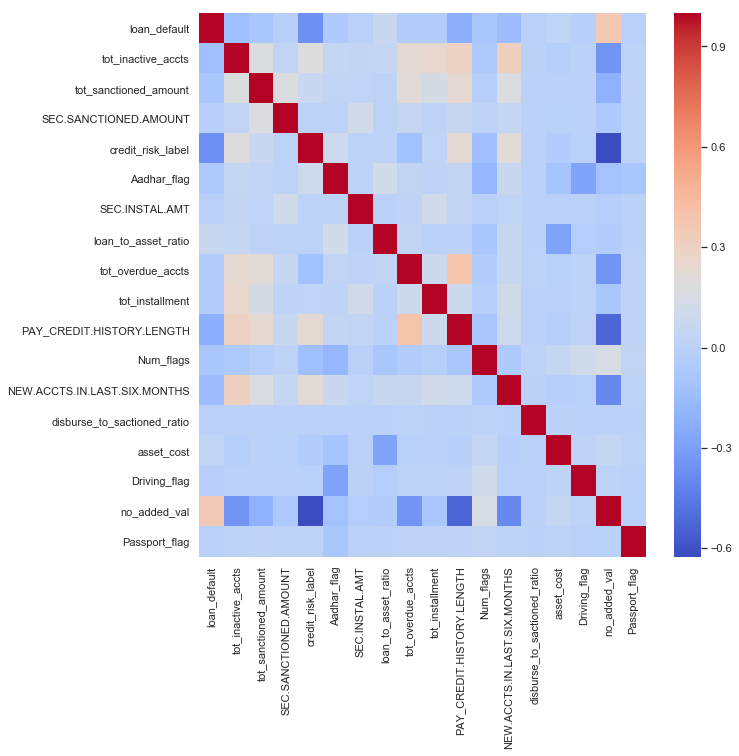

In [64]:
# create the set with variables that will be tested for modeling
vars_for_model=vehicle[['loan_default','tot_inactive_accts','tot_sanctioned_amount','SEC.SANCTIONED.AMOUNT','credit_risk_label',
                       'Aadhar_flag','SEC.INSTAL.AMT','loan_to_asset_ratio','tot_overdue_accts',
                       'tot_installment','PAY_CREDIT.HISTORY.LENGTH','Num_flags','NEW.ACCTS.IN.LAST.SIX.MONTHS','disburse_to_sactioned_ratio',
                       'asset_cost','Driving_flag','no_added_val','Passport_flag',]]

# MODIFICO  dejare todas        
#vars_for_model=whole_set      
 # 'Employment.Type' is causing problems  also 'PERFORM_CNS.SCORE.DESCRIPTION' we neew dummies
# Identify correlation between variables 
plt.figure(figsize = (10,10))
corr = sns.heatmap(vars_for_model.corr(),annot=False, fmt = ".3f", cmap = "coolwarm")
plt.savefig('final_correlation_matrix')
#OK variables look good now

In [65]:
#sns.pairplot(vars_for_model,hue='loan_default')
#plt.savefig('cross_correlation_matrix')


In [66]:
# BEGIN MODELING
# TRY LOGISTIC REGRESSION JUST TO SHOW HOW TO EXPLAIN MODEL RESULTS


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
# analyza target with proportion
count_no_sub = len(vehicle[vehicle['loan_default']==0])
count_sub = len(vehicle[vehicle['loan_default']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of GOOD customers who pay the credit ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of BAD customer who default", pct_of_sub*100)

percentage of GOOD customers who pay the credit  67.88548936335505
percentage of BAD customer who default 32.11451063664496


In [69]:
#apply oversampling fity-fifty
X = vars_for_model.loc[:, vars_for_model.columns != 'loan_default']
y = vars_for_model.loc[:, vars_for_model.columns == 'loan_default']

In [70]:
print(vehicle.shape)
print(test_sample.shape)
#print(test_data.shape)

(154466, 76)
(112392, 73)


In [131]:
#after correlation eliminated
features = [ 'tot_inactive_accts','tot_sanctioned_amount','SEC.SANCTIONED.AMOUNT','credit_risk_label',
                       'Aadhar_flag','SEC.INSTAL.AMT','loan_to_asset_ratio','tot_overdue_accts',
                       'tot_installment','PAY_CREDIT.HISTORY.LENGTH','Num_flags','NEW.ACCTS.IN.LAST.SIX.MONTHS','disburse_to_sactioned_ratio',
                       'asset_cost','Driving_flag','Passport_flag' ]

#'PRI.CURRENT.BALANCE',  marca error tal vez tenga outlierts
#'bal_disburse_ratio',

In [132]:
from sklearn.preprocessing import  RobustScaler
# std_scaler = StandardScaler()
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

scaled_training = vehicle.copy()
scaled_testing = test_sample.copy()


scaled_training[features] = rob_scaler.fit_transform(scaled_training[features])
scaled_testing[features] = rob_scaler.fit_transform(scaled_testing[features])

y = scaled_training.loan_default
X = scaled_training[features]

In [133]:
#apply oversampling....
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
print(X_train.shape, y_train.shape)


(115849, 16) (115849,)
(38617, 16) (38617,)
(157290, 16) (157290,)


In [134]:
def train_model(model):
    # Checking accuracy
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy_score',accuracy_score(y_test, pred))
    print('recall_score',recall_score(y_test, pred))
    print('f1_score',f1_score(y_test, pred))
    print('roc_auc_score',roc_auc_score(y_test, pred))
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    return model

In [143]:
# train model
#https://www.kaggle.com/mamtadhaker/vehicle-loan-default-prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score, roc_curve, auc
rfc = RandomForestClassifier()
rfc = train_model(rfc)
# predict on test set

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.7691431234948339
recall_score 0.5256410256410257
f1_score 0.5939051610258279
roc_auc_score 0.7049910258855518
confusion_matrix
       0     1
0  23183  3032
1   5883  6519


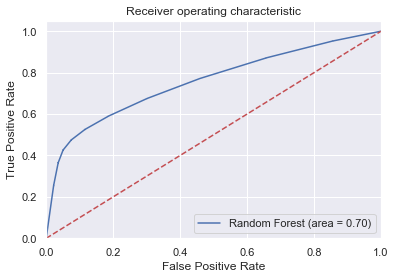

In [144]:

#ROC Curve   .....could be much better....
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RandomForestOK')
plt.show()

In [145]:
#Predicting the test set results and calculating the accuracy
y_pred = rfc.predict(X_test)
print('Accuracy of logistic regression classifier on test set(oversampled): {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set(oversampled): 0.73


In [147]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23183  3032]
 [ 5883  6519]]


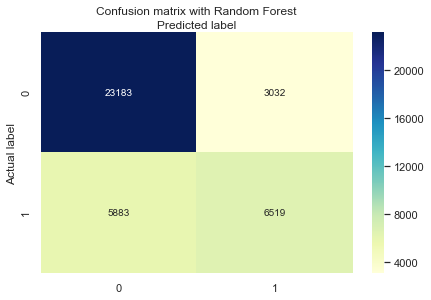

In [160]:
#plot confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Confusion_matrix_RandomForestOK')

In [150]:
#results with test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     26215
           1       0.68      0.53      0.59     12402

    accuracy                           0.77     38617
   macro avg       0.74      0.70      0.72     38617
weighted avg       0.76      0.77      0.76     38617



In [175]:
# predict the original and sent to a dataframe to build the distribution table
# with Random Forest

pr_Bad = rfc.predict_proba(X_test)
print(pr_Bad)
RFC_final_proba=pd.DataFrame(pr_Bad)

RFC_final_proba.to_csv('RFC_final_proba_test.csv')


[[0.9 0.1]
 [0.8 0.2]
 [0.  1. ]
 ...
 [1.  0. ]
 [0.5 0.5]
 [1.  0. ]]


In [176]:
y_test_DF=pd.DataFrame(y_test, columns=['loan_default']) 
y_test_DF.to_csv('y_test_original.csv')


In [ ]:
###### LOGISTIC REGRESION

In [121]:
cols=['tot_inactive_accts','tot_sanctioned_amount','SEC.SANCTIONED.AMOUNT','credit_risk_label',
                       'Aadhar_flag','SEC.INSTAL.AMT','loan_to_asset_ratio','tot_overdue_accts',
                       'tot_installment','PAY_CREDIT.HISTORY.LENGTH','Num_flags','NEW.ACCTS.IN.LAST.SIX.MONTHS','disburse_to_sactioned_ratio',
                       'asset_cost','Driving_flag','no_added_val','Passport_flag']
X=X_test
y=y_test

#implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

#The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

Optimization terminated successfully.
         Current function value: 0.558841
         Iterations 10
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.118     
Dependent Variable:     loan_default         AIC:                  12981.4624
Date:                   2019-11-12 12:11     BIC:                  13099.1832
No. Observations:       11586                Log-Likelihood:       -6474.7   
Df Model:               15                   LL-Null:              -7338.8   
Df Residuals:           11570                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------

In [116]:

#eliminate pvalue >0.05
cols=['tot_sanctioned_amount','SEC.SANCTIONED.AMOUNT','credit_risk_label',
                       'loan_to_asset_ratio','tot_overdue_accts',
                       'PAY_CREDIT.HISTORY.LENGTH','Num_flags','NEW.ACCTS.IN.LAST.SIX.MONTHS','disburse_to_sactioned_ratio',
                      'Driving_flag','no_added_val','Passport_flag']
X=X_test
y=y_test

#implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.553780
         Iterations 9
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.118     
Dependent Variable:     loan_default         AIC:                  42802.6470
Date:                   2019-11-12 12:09     BIC:                  42939.6302
No. Observations:       38617                Log-Likelihood:       -21385.   
Df Model:               15                   LL-Null:              -24241.   
Df Residuals:           38601                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         9.0000                                               
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

In [117]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#Coefficients of the model:
#https://andrew47.github.io/scikitlearn-log-reg.html
print(logreg.coef_)

#Intercept is:
print(logreg.intercept_)

[[-1.26138557e-01 -7.31208923e-02  3.45191980e-07 -2.05739230e-01
   1.56504042e-02 -1.92522291e-07  1.30439432e-01 -1.91714759e-02
   1.02881524e-03 -2.43914343e-01 -1.07067019e-01 -2.30664062e-01
  -1.86663758e-06 -2.35274263e-02 -1.49422389e-02 -2.19952019e-03]]
[-0.3172498]


In [125]:
#print tabla vars and its coefficients
#pd.DataFrame({ 'Feature Names': cols,
              #'Coefficient Values': logreg.coef_[0]})

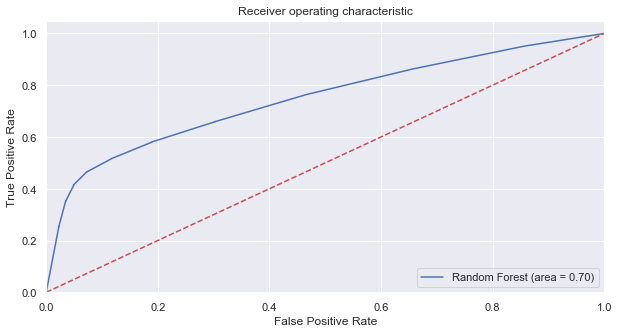

In [127]:

#ROC Curve   .....could be much better....
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RandomForestOK')
plt.show()

In [123]:
#MAKING PREDICITONS -- choose fist record in test
#Predicting class (-1 for Good, +1 for Bad):
logreg.predict(X_test[0:1])

#Predicting probability:
#pr_Good = logreg.predict_proba(X_test[0:1])[0][0]
#pr_Bad = logreg.predict_proba(X_test[0:1])[0][1]
#RECORD NUMBER 5
#pr_Good = logreg.predict_proba(X_test)[0][0]
#pr_Bad = logreg.predict_proba(X_test)[0][1]
# PR_Good+pr_bad=1
#print (pr_Good, pr_Bad)

#pr_Good = logreg.predict_proba(X_train[0:1])[0][0]
#pr_Bad = logreg.predict_proba(X_train[0:1])[0][1]

#to get thw whole predictions
pr_Bad = logreg.predict_proba(X_test)
pr_Bad
#print (pr_Good, pr_Bad)
pr_Bad = logreg.predict_proba(X_train)
pr_Bad
#sent to a DATAFRAME


array([[0.70313719, 0.29686281],
       [0.50304808, 0.49695192],
       [0.55595021, 0.44404979],
       ...,
       [0.68107092, 0.31892908],
       [0.68164901, 0.31835099],
       [0.68939924, 0.31060076]])

In [128]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set(oversampled): {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set(oversampled): 0.72


In [129]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# 1st try- error 2585+7472  equiv 40%  ----- the model can improve alot!!!!!!

[[7620  155]
 [3096  715]]
